# Data Visualisation

In this notebook, we will visualise the data we have combined:
- LF Data
- RF Data
- Wrist Data
- Waist Data

We can select the Subject Id and the Activity that we are interested in.

In [1]:
# !pip install ggplot

In [11]:
from ggplot import *
import pandas as pd

In [26]:
####### Select Subject Id #######
# Key in a number from 1 to 20. 

# 1 to 11: indoors
# 12 to 20: outdoors

SUBJECT_ID = '5'

###### Select Activity ###### 
# Key in one of the options below:

## For indoors: 
# treadmill_walk
# treadmill_walknrun
# treadmill_slope_walk
# indoor_walk
# indoor_walknrun

## For outdoors:
# outdoor_walk
# outdoor_walknrun

ACTIVITY = 'indoor_walknrun'

###### Select Segment ######
start = 1
end = 500

In [32]:
# Read in the data
import os
DATA_PATH = r'D:\NUS_TERM2_CA3\MAREA_dataset\Subject_Data_txt_format'

df_LF = pd.read_csv(os.path.join(DATA_PATH, 'Sub'+ SUBJECT_ID + '_LF.txt'), header = 0)
df_RF = pd.read_csv(os.path.join(DATA_PATH, 'Sub'+ SUBJECT_ID + '_RF.txt'), header = 0)
df_Waist = pd.read_csv(os.path.join(DATA_PATH, 'Sub'+ SUBJECT_ID + '_Waist.txt'), header = 0)
df_Wrist = pd.read_csv(os.path.join(DATA_PATH, 'Sub'+ SUBJECT_ID + '_Wrist.txt'), header = 0)

df = pd.concat([df_LF, df_RF, df_Waist, df_Wrist], axis=1)

df.columns = ['accX_LF','accY_LF','accZ_LF', 
              'accX_RF', 'accY_RF', 'accZ_RF',
              'accX_Waist', 'accY_Waist', 'accZ_Waist',
               'accX_Wrist', 'accY_Wrist', 'accZ_Wrist']

In [33]:
# df = df.drop(df.columns[0], axis=1)
df.tail()

,accX_LF,accY_LF,accZ_LF,accX_RF,accY_RF,accZ_RF,accX_Waist,accY_Waist,accZ_Waist,accX_Wrist,accY_Wrist,accZ_Wrist
257016,0.471,-9.098,-3.451,11.137,-18.667,-12.706,-1.412,-7.843,-1.569,-2.039,13.176,4.392
257017,0.784,-8.941,-3.608,12.235,-27.137,-11.608,-2.039,-7.843,-1.882,-2.667,13.176,4.235
257018,0.941,-8.627,-3.137,16.157,-26.510,-16.941,-2.667,-8.157,-1.569,-3.451,13.020,4.235
257019,0.784,-9.412,-2.039,29.020,-19.137,-16.471,-2.824,-8.314,-1.725,-3.765,12.863,4.392
257020,0.471,-9.725,-2.039,29.647,-16.941,-16.784,-2.824,-8.784,-1.882,-4.549,12.863,4.392


In [36]:
# Subset out the data by activity of interest

# k1=df[df[ACTIVITY]==1]
k1=df
k1.head()

,accX_LF,accY_LF,accZ_LF,accX_RF,accY_RF,accZ_RF,accX_Waist,accY_Waist,accZ_Waist,accX_Wrist,accY_Wrist,accZ_Wrist
0,-0.314,-8.627,-4.706,-7.059,-6.118,5.020,-0.314,-9.882,0.314,-3.451,9.098,3.608
1,-1.098,-9.569,-4.549,-6.275,-6.431,4.706,-0.784,-9.725,0.314,-3.137,9.725,3.451
2,-0.941,-9.725,-4.235,-5.490,-7.373,3.608,-1.255,-9.098,0.471,-3.294,10.667,3.608
3,-1.098,-9.882,-2.196,-4.706,-7.843,2.824,-1.098,-8.941,0.784,-3.451,12.235,4.235
4,-1.098,-8.941,-2.353,-2.980,-9.255,1.569,-1.412,-9.255,1.098,-3.294,13.020,3.922


In [37]:
k1.index

RangeIndex(start=0, stop=257021, step=1)

In [38]:
k1.reset_index(level=0, inplace=True)

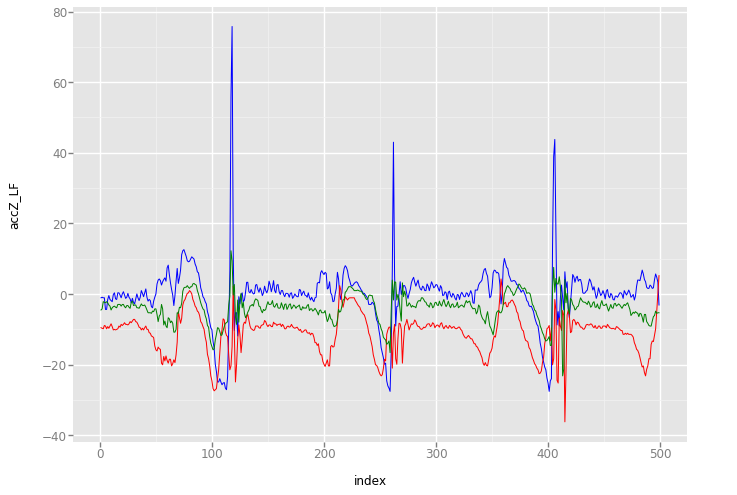

<ggplot: (-9223371911194950610)>

In [39]:
ggplot(aes(x='index'), data=k1[start:end]) +\
    geom_line(aes(y='accX_LF'), color='blue') +\
    geom_line(aes(y='accY_LF'), color='red') +\
    geom_line(aes(y='accZ_LF'), color='green')

In [40]:
# multiply the HS and TO by 30 (15) and -30 (15)
# this is to make it more obvious in the visualisation

k1['LF_HS_mult']= k1.LF_HS.apply(lambda x: (x*30))
k1['RF_HS_mult']= k1.RF_HS.apply(lambda x: (x*30))
k1['LF_TO_mult']= k1.LF_TO.apply(lambda x: (x*-30))
k1['RF_TO_mult']= k1.RF_TO.apply(lambda x: (x*-30))

k1['LF_HS_mult2']= k1.LF_HS.apply(lambda x: (x*15))
k1['RF_HS_mult2']= k1.RF_HS.apply(lambda x: (x*15))
k1['LF_TO_mult2']= k1.LF_TO.apply(lambda x: (x*-15))
k1['RF_TO_mult2']= k1.RF_TO.apply(lambda x: (x*-15))


AttributeError: 'DataFrame' object has no attribute 'LF_HS'

KeyError: 'LF_HS_mult'

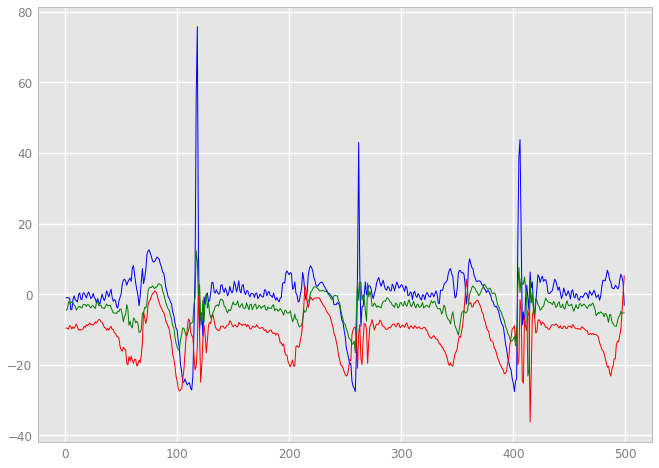

In [41]:
#Left Foot
ggplot(aes(x='index'), data=k1[start:end]) +\
    geom_line(aes(y='accX_LF'), color='blue') +\
    geom_line(aes(y='accY_LF'), color='red') +\
    geom_line(aes(y='accZ_LF'), color='green') +\
    geom_point(aes(y='LF_HS_mult'), color='steelblue', size=100) +\
    geom_point(aes(y='LF_TO_mult'), color='blue', size=100) +\
    geom_point(aes(y='RF_HS_mult'), color='hotpink', size=100) +\
    geom_point(aes(y='RF_TO_mult'), color='pink', size=100) +\
    scale_y_continuous(limits=(-40,40)) +\
    ggtitle('Left Foot Acceleration') +\
    xlab('index') +\
    ylab('Acceleration')

KeyError: 'LF_HS_mult'

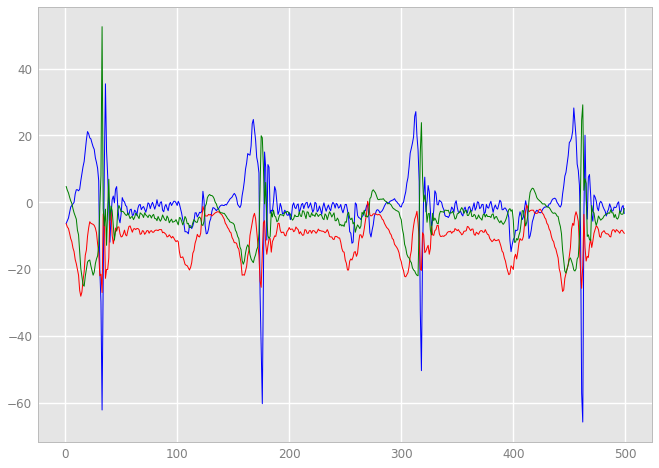

In [42]:
#Right Foot
ggplot(aes(x='index'), data=k1[start:end]) +\
    geom_line(aes(y='accX_RF'), color='blue') +\
    geom_line(aes(y='accY_RF'), color='red') +\
    geom_line(aes(y='accZ_RF'), color='green') +\
    geom_point(aes(y='LF_HS_mult'), color='steelblue', size=100) +\
    geom_point(aes(y='LF_TO_mult'), color='slateblue', size=100) +\
    geom_point(aes(y='RF_HS_mult'), color='hotpink', size=100) +\
    geom_point(aes(y='RF_TO_mult'), color='pink', size=100) +\
    scale_y_continuous(limits=(-40,40)) +\
    ggtitle('Right Foot Acceleration') +\
    xlab('index') +\
    ylab('Acceleration')

KeyError: 'LF_HS_mult2'

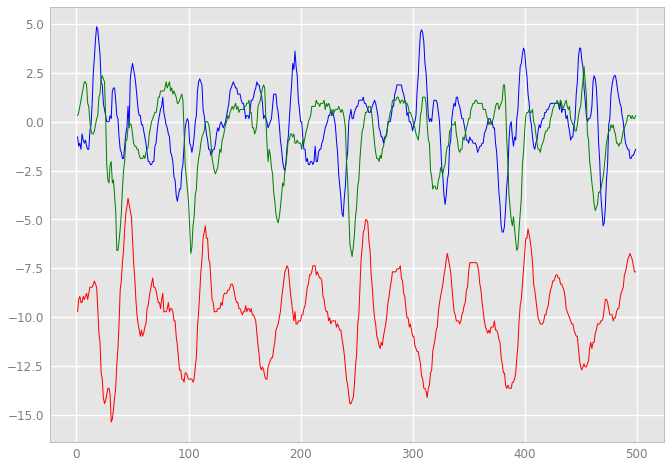

In [43]:
#Waist
ggplot(aes(x='index'), data=k1[start:end]) +\
    geom_line(aes(y='accX_Waist'), color='blue') +\
    geom_line(aes(y='accY_Waist'), color='red') +\
    geom_line(aes(y='accZ_Waist'), color='green') +\
    geom_point(aes(y='LF_HS_mult2'), color='steelblue', size=100) +\
    geom_point(aes(y='LF_TO_mult2'), color='slateblue', size=100) +\
    geom_point(aes(y='RF_HS_mult2'), color='hotpink', size=100) +\
    geom_point(aes(y='RF_TO_mult2'), color='pink', size=100) +\
    scale_y_continuous(limits=(-20,20)) +\
    ggtitle('Waist Foot Acceleration') +\
    xlab('index') +\
    ylab('Acceleration')

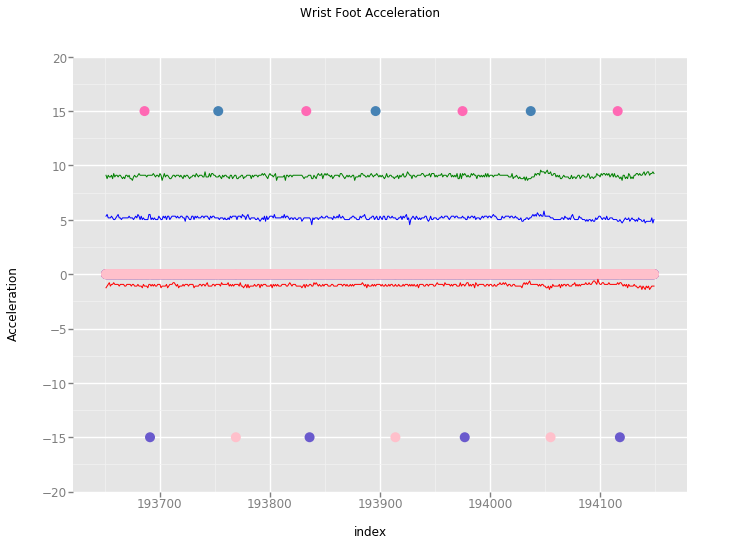

<ggplot: (7612020926)>

In [135]:
#Wrist
ggplot(aes(x='index'), data=k1[start:end]) +\
    geom_line(aes(y='accX_Wrist'), color='blue') +\
    geom_line(aes(y='accY_Wrist'), color='red') +\
    geom_line(aes(y='accZ_Wrist'), color='green') +\
    geom_point(aes(y='LF_HS_mult2'), color='steelblue', size=100) +\
    geom_point(aes(y='LF_TO_mult2'), color='slateblue', size=100) +\
    geom_point(aes(y='RF_HS_mult2'), color='hotpink', size=100) +\
    geom_point(aes(y='RF_TO_mult2'), color='pink', size=100) +\
    scale_y_continuous(limits=(-20,20)) +\
    ggtitle('Wrist Foot Acceleration') +\
    xlab('index') +\
    ylab('Acceleration')